# Ejercicios Graphs, Paths & Components

Ejercicios básicos de Grafos.

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Ejercicio - Número de Nodos y Enlaces

_ (resuelva en código propio y usando la librería NetworkX (python) o iGraph (R)) _

Cuente el número de nodos y enlaces con los siguientes links (asumiendo que el grafo puede ser dirigido Y no dirigido): 

In [51]:
edges = set([(1, 2), (2, 1), (3, 1), (3, 2), (2, 4)])

In [78]:
nodes = set()
for x,y in edges:
    nodes.add(x)
    nodes.add(y)
print(nodes)
print(len(nodes))

{1, 2, 3, 4}
4


False
False
False
False
False
0
Grafo no dirigido:
number of nodes:  4
number of edges:  4

Grafo dirigido:
number of nodes:  4
number of edges:  5


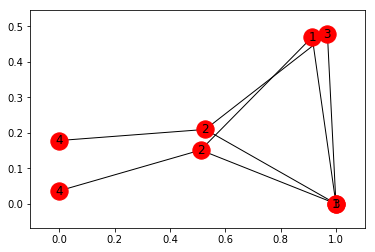

In [77]:
#Grafo dirigido
print('Grafo no dirigido:')
G=nx.Graph()
G.add_edges_from(edges)
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()
print('number of nodes: ', number_nodes)
print('number of edges: ', number_edges)
nx.draw_networkx(G)
print('')
print('Grafo dirigido:')
DG=nx.DiGraph()
DG.add_edges_from(edges)
number_nodes = DG.number_of_nodes()
number_edges = DG.number_of_edges()
print('number of nodes: ', number_nodes)
print('number of edges: ', number_edges)
nx.draw_networkx(G)

## Ejercicio - Matriz de Adyacencia

_ (resuelva en código propio y usando la librería NetworkX (python) o iGraph (R)) _

Cree la matriz de adyacencia del grafo del ejercicio anterior (para dirigido y no-dirigido)

In [57]:
AG = nx.adjacency_matrix(G)
ADG = nx.adjacency_matrix(DG)
print(AG.todense())
print(ADG.todense())

[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]
[[0 1 0 0]
 [1 0 0 1]
 [1 1 0 0]
 [0 0 0 0]]


## Ejercicio - Sparseness

Calcule la proporción entre número de links existentes en 3 redes reales (http://snap.stanford.edu/data/index.html) contra el número de links posibles.

En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

## Ejercicio - Redes Bipartitas

Defina una red bipartita y genere ambas proyecciones, explique qué son los nodos y links tanto de la red original como de las proyeccciones

## Ejercicio - Paths

Cree un grafo de 5 nodos con 5 enlaces. Elija dos nodos cualquiera e imprima:
+ 5 Paths diferentes entre los nodos
+ El camino mas corto entre los nodos
+ El diámetro de la red
+ Un self-avoiding path


# Ejercicio - Componentes

Baje una red real (http://snap.stanford.edu/data/index.html) y lea el archivo 

Utilizando NetworkX o iGraph descubra el número de componentes

Implemente el algorithmo Breadth First para encontrar el número de componentes (revise que el resultado es el mismo que utilizando la librería)

## Ejercicio - Degree distribution

_ (resuelva en código propio y usando la librería NetworkX (python) o iGraph (R)) _

Haga un plot con la distribución de grados de la red real

Calcule el grado promedio

## Ejercicio - Diámetro

In [7]:
N = 5

Cree un grafo de N nodos con el máximo diámetro posible

Cree un grafo de N nodos con el mínimo diámetro posible

Cree un grafo de N nodos que sea un ciclo simple

## Ejercicio - Pregunta "real"

Una aerolínea tiene las siguientes rutas desde las ciudades a las que sirve (cada par tiene servicio en ambas direcciones).

In [8]:
routemap =  [('St. Louis', 'Miami'), 
             ('St. Louis', 'San Diego'), 
             ('St. Louis', 'Chicago'), 
             ('San Diego', 'Chicago'), 
             ('San Diego', 'San Francisco'), 
             ('San Diego', 'Minneapolis'), 
             ('San Diego', 'Boston'), 
             ('San Diego', 'Portland'), 
             ('San Diego', 'Seattle'), 
             ('Tulsa', 'New York'), 
             ('Tulsa', 'Dallas'), 
             ('Phoenix', 'Cleveland'), 
             ('Phoenix', 'Denver'), 
             ('Phoenix', 'Dallas'), 
             ('Chicago', 'New York'), 
             ('Chicago', 'Los Angeles'), 
             ('Miami', 'New York'), 
             ('Miami', 'Philadelphia'), 
             ('Miami', 'Denver'), 
             ('Boston', 'Atlanta'), 
             ('Dallas', 'Cleveland'), 
             ('Dallas', 'Albuquerque'), 
             ('Philadelphia', 'Atlanta'), 
             ('Denver', 'Minneapolis'), 
             ('Denver', 'Cleveland'), 
             ('Albuquerque', 'Atlanta'), 
             ('Minneapolis', 'Portland'), 
             ('Los Angeles', 'Seattle'), 
             ('San Francisco', 'Portland'), 
             ('San Francisco', 'Seattle'), 
             ('San Francisco', 'Cleveland'), 
             ('Seattle', 'Portland')]

Cuál es el máximo número de intercambios que tendría que hacer un pasajero en un solo viaje entre dos ciudades servidas? (suponiendo rutas óptimas)

Si usted necesitara viajar mucho en esta aerolínea, cual sería el lugar óptimo para vivir? (i.e. minimizar el número de intercambios para llegar a cualquier ciudad) 

Visualize la red